# Vehicle Recall Data - David's Work with CMPL and Mileage
### Initial Questions
* What Make/Model is being recalled?
    * See Fig 1, Fig 2, and Fig 3
    * Honda, Ford, Blue Bird most common
* What specific problems led to the recall?
    * Most common by far is airbags (Fig 5)
* Is this correlated to an increase in defects or better QA?
* At what mileage did we start seeing the problem?
    * Average Miles at Failure: 68334.08213141191
* Did an increase in complaints lead to a recall?
    * Generally, as the number of recalls go up, the number of complaints also go up (Fig 4)

# Required Code

This is the code required to load the datasets we need

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import re

data_path = 'data'
fields_path = 'fields'

# Read and parse a file containing column names for a dataset.
# Returns a list of strings (the column names).
def load_column_names(columns_file_name):
    file = open(columns_file_name)
    column_names = []
    readingFields = False
    for line in file:
        if readingFields:
            if re.match('^[0-9]', line):
                split_line = line.split()
                column_names.append(split_line[1])
        elif line.startswith('Field#'):
            readingFields = True
    file.close()
    return column_names
#}

# Load a dataest by its abbreviated names (ex: RCL).
def load_data_file(name, encoding):
    
    # Read the column names from a separate file.
    fields_file_name = fields_path + '/' + name + '.txt';
    names = load_column_names(fields_file_name)
    
    # Read the data from a CSV file.
    data_file_name = 'FLAT_' + name + '.txt';
    df = pd.read_csv(data_path + '/' + data_file_name,
                     delimiter='\t', header=None, encoding=encoding, names=names)
    
    return df
#}


In [4]:
# Load complaints dataset.
cmpl_df = load_data_file('CMPL', encoding='iso-8859-1');

# Load recalls dataset.
rcl_df = load_data_file('RCL', encoding='latin1');

/Users/matt/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (15,22,26,32,33,34,35,36,38,39,40,41,42,43,44,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/matt/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


# Data Exploration

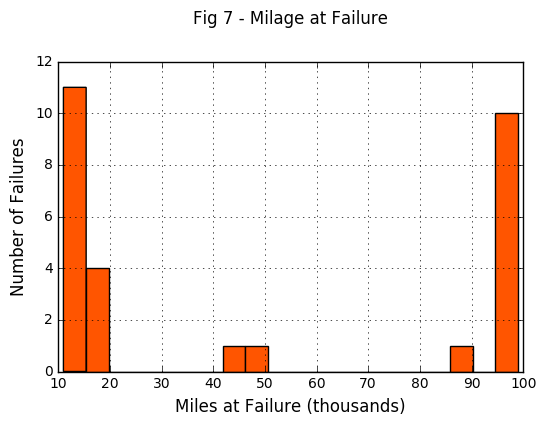

In [5]:

#plt.figure()
#cmpl_df['MILES'].plot(kind='box')
#plt.gcf()
#cmpl_df['MILES'].describe()

col_miles = cmpl_df['MILES'].dropna();


#cmpl_df[(cmpl_df['MILES'] >= 99) & (cmpl_df['MILES'] <= 101)]["MILES"]
#cmpl_df[(cmpl_df['MILES'] < 0)]["MILES"]

clean_miles = cmpl_df[(cmpl_df["MILES"] >= 0) & (cmpl_df["MILES"] < 300000)]["MILES"]

clean_miles = clean_miles / 1000;

clean_df = cmpl_df[(cmpl_df["MILES"] >= 0) & (cmpl_df["MILES"] < 300000)]

#clean_miles = cmpl_df['VEH_SPEED'].dropna();
#clean_miles = pd.to_numeric(cmpl_df['NUM_CYLS'], errors='coerce').dropna()
#clean_miles = clean_miles[(clean_miles >= 2) & (clean_miles <= 10)]
#clean_miles = cmpl_df[(cmpl_df['VEH_SPEED'] >= 140) & (cmpl_df['VEH_SPEED'] < 1000)]['VEH_SPEED']

clean_miles = cmpl_df['DEATHS']
clean_miles = clean_miles[(clean_miles > 10) & (clean_miles <= 99)]


plt.figure()
clean_miles.hist(bins=20, color='#FF5500')
#clean_df.plot(kind='scatter', x='MILES', y='OCCURENCES');
plt.title("Fig 7 - Milage at Failure", y=1.1)
plt.ylabel('Number of Failures', fontsize=12)
plt.xlabel('Miles at Failure (thousands)', fontsize=12)
plt.gcf()



In [ ]:

clean_df = cmpl_df[(cmpl_df["MILES"] >= 0) & (cmpl_df["MILES"] < 300000)]

plt.figure()
clean_df.plot(kind='scatter', x='MILES', y='OCCURENCES');
plt.title("Fig 5 - Number of Failures per Mile at Failure")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Miles at Failure', fontsize=12)
plt.gcf()

#create_box_graph(clean_df, col_x='MILES', col_y='OCCURENCES', num_bins=10);



In [ ]:
import math;
matplotlib.style.use('ggplot')

curr_df = cmpl_df[["MILES", "OCCURENCES"]].dropna();
#curr_df = [(curr_df["MILES"] >= 980000) & (curr_df["MILES"] < 1000000)]

numBins = 20 + 1;
bins = py.linspace(0, 200000, numBins);
#bins = py.linspace(0, 50000, numBins);
#bin_df = pd.cut(curr_df['MILES'], bins, labels=bins[1:])

#print(bin_df)

binLabels = bins[1:];
binLabels = list(map(lambda x: math.floor(x / 1000), binLabels));
    
    
plt.figure()
curr_df.groupby(pd.cut(curr_df["MILES"], bins, labels=binLabels))["OCCURENCES"].sum().plot(kind='bar', color='#FF2200')
#bin_df.value_counts(sort=False).plot(kind='bar')
plt.title("Fig 8 - Number of Failure Occurrences by Mile", y=1.1);
plt.xlabel("Miles at Failure (thousands)", fontsize=12);
plt.ylabel("Number of Occurrences", fontsize=12);
plt.gcf()

#bins = py.linspace(0, 300000, numBins)
#bins = math.floor(bins)
#bins
#bin_df.value_counts(sort=False)

#cmpl_df['MILES'].value_counts()
#bin_df.describe()
#cmpl_df["MILES"].describe()

#bins = [900000, 1000000];
#cmpl_df.groupby(pd.cut(cmpl_df['MILES'], bins))["OCCURENCES"].describe()

#curr_df["OCCURENCES"].describe()
#curr_df[(curr_df["OCCURRENCES"] >= 980000) & (curr_df["MILES"] < 1000000)]

In [ ]:
cmpl_df = cmpl_df_new[cmpl_df_new["CMPLID"] > 1347687];

matplotlib.style.use('ggplot')

orange = '#FF6600';
blue = '#6666FF';

plotParams = {'labels':['No','Yes'], 'colors':[blue, orange], 'autopct':'%1.1f%%'}
titleOffset = 1.1;

plt.figure()
#cmpl_df["CRASH"].value_counts().plot.pie(labels=['No','Yes'], colors=[blue, orange], autopct='%1.1f%%');
cmpl_df["CRASH"].value_counts().plot.pie(**plotParams);
plt.title("Defects involving a Crash", y=titleOffset);
plt.axis('equal')
plt.ylabel("");
plt.show();

plt.figure()
((cmpl_df["INJURED"] > 0) | (cmpl_df["DEATHS"] > 0)).value_counts().plot.pie(**plotParams);
plt.title("Defects Involving Injuries or Death", y=titleOffset);
plt.axis('equal')
plt.ylabel("");
plt.show();

crashes_df = cmpl_df[cmpl_df["CRASH"] == 'Y'];

plt.figure()
#((cmpl_df["INJURED"] > 0) | (cmpl_df["DEATHS"] > 0)).value_counts().plot.pie();
((crashes_df["INJURED"] > 0) | (crashes_df["DEATHS"] > 0)).value_counts().plot.pie(**plotParams);
plt.title("Crashes Involving Injuries or Death", y=titleOffset);
plt.axis('equal')
plt.ylabel("");
plt.show();



In [ ]:
cmpl_df = load_data_file('CMPL', encoding='iso-8859-1')
#cmpl_df_new = load_data_file('CMPL_NEW', encoding='iso-8859-1')

print(cmpl_df["CMPLID"].max())
print(cmpl_df_new["CMPLID"].max())
print(cmpl_df_new["CMPLID"].max() - cmpl_df["CMPLID"].max())

cmpl_df_new[cmpl_df_new["CMPLID"] > 1347687]["CMPLID"].describe()

#cmpl_df['OCCURENCES'].describe()

#clean_col = cmpl_df[(cmpl_df["OCCURENCES"] >= -1000) & (cmpl_df["OCCURENCES"] < 20)]["OCCURENCES"]

#plt.figure()
#clean_col.hist(bins=20, color='#FF5500')
#clean_df.plot(kind='scatter', x='MILES', y='OCCURENCES');
#plt.title("Fig 7 - Milage at Failure", y=1.1)
#plt.ylabel('Number of Failures', fontsize=12)
#plt.xlabel('Miles at Failure (thousands)', fontsize=12)
#plt.gcf()

# Data cleaning for prediction

### Load the Complaints and Recalls datasets

In [6]:
# Load the complaints and recalls dataset.
cmpl_df = load_data_file('CMPL', encoding='iso-8859-1');
rcl_df = load_data_file('RCL', encoding='latin1');

/Users/matt/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (15,22,26,32,33,34,35,36,38,39,40,41,42,43,44,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/matt/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


### Filter and clean the Complaints dataset

In [7]:

# Create list of the columns we will use.
key_cols = ['MAKETXT', 'MODELTXT', 'YEARTXT']
numer_cols = ['INJURED', 'DEATHS', 'MILES', 'OCCURENCES', 'NUM_CYLS', 'VEH_SPEED']
bool_cols = ['CRASH', 'FIRE', 'POLICE_RPT_YN', 'ORIG_OWNER_YN', 'ANTI_BRAKES_YN', 'CRUISE_CONT_YN', 'MEDICAL_ATTN', 'VEHICLES_TOWED_YN']
cat_cols = bool_cols + ['DRIVE_TRAIN', 'FUEL_SYS', 'FUEL_TYPE', 'TRANS_TYPE']
all_cols = key_cols + numer_cols + cat_cols

# Filter out rows with invalid make, model, or year.
# Also filter out any non-vehicles.
clean_df = cmpl_df[(cmpl_df['MAKETXT'] != 'UNKNOWN') &
                   (cmpl_df['MODELTXT'] != 'UNKNOWN') &
                   (cmpl_df['YEARTXT'] > 1900) &
                   (cmpl_df['YEARTXT'] < 2020) &
                   (cmpl_df['PROD_TYPE'] == 'V')][all_cols].copy()

# Convert certain columns to a numerical data type.
clean_df['NUM_CYLS'] = pd.to_numeric(clean_df['NUM_CYLS'], errors='coerce')

# Replace particular "bogus" values with NaN, which get filled later.
clean_df['INJURED'] = clean_df['INJURED'].replace(99, np.nan).fillna(0)
clean_df['DEATHS'] = clean_df['DEATHS'].replace(99, np.nan).fillna(0)

# Clamp the values for specific numerical columns.
clean_df['NUM_CYLS'] = clean_df['NUM_CYLS'].clip(4, 8)
clean_df['MILES'] = clean_df['MILES'].clip(0, 300000)
clean_df['OCCURENCES'] = clean_df['OCCURENCES'].clip(1, 10)
clean_df['VEH_SPEED'] = clean_df['VEH_SPEED'].clip(0, 100)

# Replace 'Y' and 'N' with 1 and 0 for boolean columns.
# Also convert them to numeric so we can average them.
# This will allow us to get a percentage of 'yes' for each vehicle type.
for column in bool_cols:
    clean_df[column] = clean_df[column].replace('Y', 1).replace('N', 0)
    clean_df[column] = pd.to_numeric(clean_df[column])

# Print out the resulting clean data set
clean_df[all_cols].head(10)

,MAKETXT,MODELTXT,YEARTXT,INJURED,DEATHS,MILES,OCCURENCES,NUM_CYLS,VEH_SPEED,CRASH,...,POLICE_RPT_YN,ORIG_OWNER_YN,ANTI_BRAKES_YN,CRUISE_CONT_YN,MEDICAL_ATTN,VEHICLES_TOWED_YN,DRIVE_TRAIN,FUEL_SYS,FUEL_TYPE,TRANS_TYPE
0,MERCURY,COUGAR,1995.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GMC,SONOMA,1995.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NISSAN,MAXIMA,1987.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FORD,RANGER,1994.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GMC,SONOMA,1995.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MAZDA,626,1991.0,1.0,0.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,LINCOLN,TOWN CAR,1994.0,0.0,0.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GMC,SONOMA,1995.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,FORD,PROBE,1991.0,0.0,0.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,FORD,WINDSTAR,1995.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Group complaints by make/model/year and perform aggregate functions on the column values

Warning: this step takes a while to perform all the aggregate functions

In [8]:
# Group the dataset by vehicle type (make/model/year)
#grouped = clean_df.head(10000).groupby(key_cols)
grouped = clean_df.groupby(key_cols)

# Create a temp dataset containing the modes for each column.
clean_modes_df = clean_df.mode()

# Aggregate function whcih returns the mean of a series. If all values
# are null, then the specified default value is returned instead.
def aggMean(x, defaultValue):
    numNonNulls = x.dropna().shape[0]
    if numNonNulls == 0:
        return defaultValue
    return x.mean()

# Aggregate function which Returns the mode of a series. If all values are null,
# then the mode of this column over the entire dataset is returned instead.
def aggMode(x):
    numNonNulls = x.dropna().shape[0]
    if numNonNulls == 0:
        return clean_modes_df[x.name][0]
    return x.value_counts().index[0]

# Perform aggregate functions on the columns for each vehicle type.
grouped_df = grouped.agg(
            {'INJURED'           : lambda x: aggMean(x, 0),
             'DEATHS'            : lambda x: aggMean(x, 0),
             'MILES'             : lambda x: aggMean(x, 0),
             'OCCURENCES'        : lambda x: aggMean(x, 1),
             'NUM_CYLS'          : lambda x: aggMode(x),
             'VEH_SPEED'         : lambda x: aggMean(x, 0),
             'CRASH'             : lambda x: aggMean(x, 0),
             'FIRE'              : lambda x: aggMean(x, 0),
             'POLICE_RPT_YN'     : lambda x: aggMean(x, 0),
             'ORIG_OWNER_YN'     : lambda x: aggMean(x, 0),
             'ANTI_BRAKES_YN'    : lambda x: aggMean(x, 0),
             'CRUISE_CONT_YN'    : lambda x: aggMean(x, 0),
             'MEDICAL_ATTN'      : lambda x: aggMean(x, 0),
             'VEHICLES_TOWED_YN' : lambda x: aggMean(x, 0),
             'DRIVE_TRAIN'       : lambda x: aggMode(x),
             'FUEL_SYS'          : lambda x: aggMode(x),
             'FUEL_TYPE'         : lambda x: aggMode(x),
             'TRANS_TYPE'        : lambda x: aggMode(x)})

# Add in a column for the number of complaints for each vehicle type.
grouped_df['COMPLAINTS'] = grouped.size()

# Print out the grouped dataset.
grouped_df.head(10)


FUEL_TYPE TRANS_TYPE  POLICE_RPT_YN  \
MAKETXT        MODELTXT          YEARTXT                                       
.              MALIBU            1998.0         GS       AUTO            0.0   
3 TON UTILITY  3EC14             2003.0         GS       AUTO            0.0   
4 TON UTILITY  4EC16W            2001.0         GS       AUTO            0.0   
                                 2002.0         GS       AUTO            0.0   
4-STAR         HORSE TRAILER     2006.0         GS       AUTO            0.0   
                                 2008.0         GS       AUTO            0.0   
                                 2012.0         GS       AUTO            0.0   
4-STAR TRAILER CARGO BUMPER PULL 2000.0         GS       AUTO            0.0   
                                 2005.0         GS       AUTO            0.0   
               CARGO GOOSENECK   2005.0         GS       AUTO            0.0   

                                             MILES  ORIG_OWNER_YN  OCCURENCES  \
MAKETXT        MODELTXT          YEARTXT                                        
.              MALIBU            1998.0        0.0            1.0         1.0   
3 TON UTILITY  3EC14             2003.0    20000.0            0.0         1.0   
4 TON UTILITY  4EC16W            2001.0   148000.0            0.0         1.0   
                                 2002.0   200000.0            0.0         1.0   
4-STAR         HORSE TRAILER     2006.0   121000.0            0.0         1.0   
                                 2008.0     5600.0            0.0         1.0   
                                 2012.0    22000.0            0.0         5.0   
4-STAR TRAILER CARGO BUMPER PULL 2000.0        0.0            0.0         1.0   
                                 2005.0        0.0            0.0         1.0   
               CARGO GOOSENECK   2005.0    91000.0            0.0         1.0   

                                          ANTI_BRAKES_YN  INJURED  \
MAKETXT        MODELTXT          YEARTXT                            
.              MALIBU            1998.0              1.0      0.0   
3 TON UTILITY  3EC14             2003.0              0.0      0.0   
4 TON UTILITY  4EC16W            2001.0              0.0      0.0   
                                 2002.0              0.0      0.0   
4-STAR         HORSE TRAILER     2006.0              0.0      0.0   
                                 2008.0              0.0      0.0   
                                 2012.0              0.0      0.0   
4-STAR TRAILER CARGO BUMPER PULL 2000.0              0.0      0.0   
                                 2005.0              0.0      0.0   
               CARGO GOOSENECK   2005.0              0.0      0.0   

                                          MEDICAL_ATTN  CRUISE_CONT_YN  \
MAKETXT        MODELTXT          YEARTXT                                 
.              MALIBU            1998.0            0.0             1.0   
3 TON UTILITY  3EC14             2003.0            0.0             0.0   
4 TON UTILITY  4EC16W            2001.0            0.0             0.0   
                                 2002.0            0.0             0.0   
4-STAR         HORSE TRAILER     2006.0            0.0             0.0   
                                 2008.0            0.0             0.0   
                                 2012.0            0.0             0.0   
4-STAR TRAILER CARGO BUMPER PULL 2000.0            0.0             0.0   
                                 2005.0            0.0             0.0   
               CARGO GOOSENECK   2005.0            0.0             0.0   

                                          NUM_CYLS FUEL_SYS  CRASH  \
MAKETXT        MODELTXT          YEARTXT                             
.              MALIBU            1998.0        6.0       FI    0.0   
3 TON UTILITY  3EC14             2003.0        6.0       FI    0.0   
4 TON UTILITY  4EC16W            2001.0        6.0       FI    1.0   
                                 2002.0

### Check which vehicle types exist in the Recalls dataset

In [56]:

# Create the set of vehicle types from the recalled dataset.
# Filter out rows with invalid make, model, or year.
# Also filter out any non-vehicles.
recalled_set = rcl_df[(rcl_df['MAKETXT'] != 'UNKNOWN') &
                      (rcl_df['MODELTXT'] != 'UNKNOWN') &
                      (rcl_df['YEARTXT'] > 1900) &
                      (rcl_df['YEARTXT'] < 2020) &
                      (rcl_df['RCLTYPECD'] == 'V')][key_cols].copy()

# Make the recalled set only have unique vehicle types,
# mostly for efficiency in the next step.
recalled_set = recalled_set[key_cols].groupby(key_cols).size()

# Now create the column in the complaints set which says
# whether a vehicle type is in the recalled set.
grouped_df['RECALLED'] = False
for index, row in grouped_df.iterrows():
    row['RECALLED'] = index in recalled_set.index
    grouped_df.loc[index] = row


### TODO: more stuff, maybe with component types?

In [57]:
#grouped_df.head(10)

grouped_df.loc['FORD', 'FOCUS']
#grouped_df.loc['HONDA', 'CIVIC']


,FUEL_TYPE,TRANS_TYPE,POLICE_RPT_YN,MILES,ORIG_OWNER_YN,OCCURENCES,ANTI_BRAKES_YN,INJURED,MEDICAL_ATTN,CRUISE_CONT_YN,...,FUEL_SYS,CRASH,DRIVE_TRAIN,VEHICLES_TOWED_YN,DEATHS,VEH_SPEED,FIRE,COMPLAINTS,RECALLED,is_train
YEARTXT,,,,,,,,,,,,,,,,,,,,,
1999.0,4,1,978,101535.250000,256,1.333333,0,0.000000,0,2914,...,3,0,5,0,0.000000,45.000000,0,13,False,True
2000.0,4,1,290,61440.539831,1436,2.360676,688,0.039227,494,704,...,3,239,3,389,0.009368,20.277751,106,5124,True,True
2001.0,4,1,515,65597.644757,1354,2.366558,572,0.075521,664,759,...,3,440,3,424,0.006076,24.415761,1861,2304,True,True
2002.0,4,1,536,54690.148990,1108,2.085977,453,0.094595,554,655,...,3,282,3,372,0.001689,24.692967,1574,1184,True,False
2003.0,4,1,187,61529.622247,522,2.075973,382,0.059122,0,266,...,3,2041,3,165,0.003378,12.523055,1549,1184,True,False
2004.0,4,1,363,57229.845272,594,1.855696,431,0.096070,591,356,...,3,126,3,411,0.002183,15.883019,1745,458,True,False
2005.0,4,1,436,64715.251781,293,1.891827,88,0.108571,398,61,...,3,248,3,333,0.000000,24.202941,1529,525,True,False
2006.0,4,1,181,66409.584158,2889,1.481481,2853,0.081545,329,2899,...,3,420,3,356,0.004292,25.474286,1465,233,False,True
2007.0,4,1,548,56476.528061,2673,1.426426,2624,0.204900,489,2651,...,3,755,3,29,0.004454,28.686930,1700,449,False,False


# Prediction stuff

### Import required libraries

In [12]:
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

In [58]:
train=grouped_df.copy()
fullData=train

#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

#Target variable is also a categorical so convert it
fullData["RECALLED"] = number.fit_transform(fullData["RECALLED"].astype('str'))

train=fullData

train['is_train'] = np.random.uniform(0, 1, len(train)) <= .75
Train, Validate = train[train['is_train']==True], train[train['is_train']==False]

In [59]:
features=list(set(all_cols) - set(key_cols))
features

['POLICE_RPT_YN',
 'FUEL_TYPE',
 'MILES',
 'VEHICLES_TOWED_YN',
 'INJURED',
 'MEDICAL_ATTN',
 'CRUISE_CONT_YN',
 'CRASH',
 'DEATHS',
 'ANTI_BRAKES_YN',
 'DRIVE_TRAIN',
 'ORIG_OWNER_YN',
 'OCCURENCES',
 'TRANS_TYPE',
 'NUM_CYLS',
 'FUEL_SYS',
 'VEH_SPEED',
 'FIRE']

In [60]:
x_train = Train[list(features)].values
y_train = Train["RECALLED"].values
x_validate = Validate[list(features)].values
y_validate = Validate["RECALLED"].values


In [61]:
random.seed(100)
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
status = rf.predict_proba(x_validate)
status

array([[ 0.41738858,  0.58261142],
       [ 0.69147446,  0.30852554],
       [ 0.44208661,  0.55791339],
       ..., 
       [ 0.28457143,  0.71542857],
       [ 0.54974928,  0.45025072],
       [ 0.63416167,  0.36583833]])

In [63]:
status = rf.predict_proba(x_validate)
fpr, tpr, _ = roc_curve(y_validate, status[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.658577441638


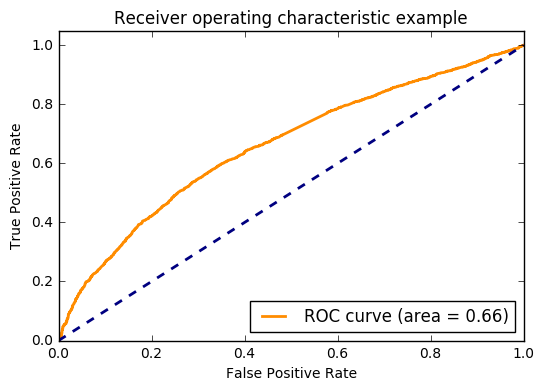

In [64]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()